# PCA

## Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2, 2), rnd_num.randn(2, 500)).T

In [10]:
X

array([[-7.06275032e-01, -5.60911546e-01],
       [-5.50810755e-01, -4.63008578e-01],
       [ 2.82811768e-02,  8.01332565e-01],
       [-5.33973291e-01,  4.45221679e-02],
       [-1.29706786e-01, -3.14604522e-01],
       [-5.86785660e-01, -1.00304672e-01],
       [ 8.35586558e-02, -1.77307670e-01],
       [-2.22196567e-01, -3.70986829e-01],
       [-1.36546749e-01,  3.40666414e-02],
       [-1.57943397e+00, -1.94383023e+00],
       [-1.19439569e+00, -1.60791845e+00],
       [ 5.07562007e-01,  4.06303013e-02],
       [ 9.68832484e-02, -4.41507920e-01],
       [-8.11677523e-01, -3.55194597e-01],
       [-2.45654801e-01, -6.05201995e-01],
       [ 1.85390092e-01, -5.83973477e-01],
       [-1.03818322e+00,  7.34423846e-02],
       [ 4.32018026e-01,  1.60020305e-01],
       [-6.04673866e-01, -3.47255098e-01],
       [ 8.85096246e-03, -7.01313307e-01],
       [-9.29534570e-01, -8.55416426e-01],
       [-1.67438227e+00, -9.99313319e-01],
       [-1.97842115e+00, -1.81686241e+00],
       [ 1.

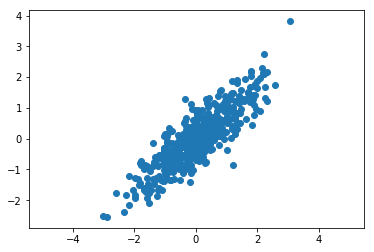

In [13]:
X[:, 0] = -X[:, 0]
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Principal Component Identification

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.components_

array([[ 0.74062812,  0.67191517],
       [ 0.67191517, -0.74062812]])

In [17]:
pca.explained_variance_

array([1.62123504, 0.12581594])

In [18]:
pca.explained_variance_ratio_

array([0.92798382, 0.07201618])

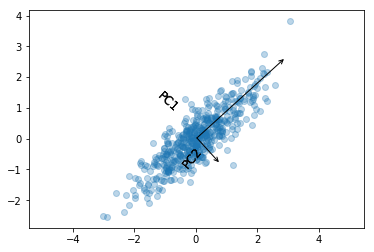

In [19]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)


# plot data

for k, v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
    
    ax = plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=1,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops=arrowprops)
    ax.text(-0.90, 1.2,'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-0.1,-0.6,'PC2', ha='center', va='center', rotation=50, size=12)
plt.axis('equal');

## Dimentionality Reduction With PCA

In [20]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [21]:
X.shape

(500, 2)

In [22]:
X_pca.shape

(500, 1)

In [ ]:
X_new = pca.inverse_transform(X_pca)
plt.